In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder , StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import KNNImputer 

In [2]:
# 1. Data Loading and Preprocessing
# Load the CSV file
file_path = r'E:\Datasets\Downhole Well Production\Well production analysis data.csv'
df = pd.read_csv(file_path)

# Convert date string to datetime
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'], format='%d-%b-%y')

# Sort by date
df = df.sort_values('DATEPRD')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15634 entries, 12328 to 12327
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_NAME        15634 non-null  object        
 2   ON_STREAM_HRS             15349 non-null  float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_WHP_P                 9155 non-null   float64       
 9   AVG_WHT_P                 9146 non-null   float64       
 10  DP_CHOKE_SIZE             15340 non-null  float64       
 11  BORE_OIL_VOL              9161 non-null   float64       
 12  BORE_GAS_VOL       

In [4]:
df.dropna(subset=['AVG_CHOKE_SIZE_P'], inplace=True)
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
1911,2008-02-12,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0,NaN,production
1912,2008-02-13,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0,NaN,production
1913,2008-02-14,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0,NaN,production
1914,2008-02-15,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0,NaN,production
1915,2008-02-16,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,2016-09-17,15/9-F-11,8.28,253.546,105.279,226.081,22.636,73.76372,27.465,85.029,4.191,180.0,32166.0,897.0,NaN,production
4966,2016-09-17,15/9-F-12,0.00,0.000,0.000,0.000,19.959,0.90339,0.000,0.000,0.026,0.0,0.0,0.0,NaN,production
9000,2016-09-17,15/9-F-15 D,0.00,345.907,90.034,345.907,0.000,0.99050,0.000,0.000,14.261,0.0,0.0,0.0,NaN,production
8022,2016-09-17,15/9-F-14,0.00,0.000,0.000,10.876,10.583,1.11322,10.876,0.000,8.828,0.0,0.0,0.0,NaN,production


In [5]:
# 3. Handle Missing Values (More Professionally)

# Separate numerical and categorical columns for imputation
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Impute missing numerical values using KNNImputer (better than simple mean)
imputer_numerical = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors
df[numerical_cols] = imputer_numerical.fit_transform(df[numerical_cols])


# Impute missing categorical values using the most frequent value (mode)
for col in categorical_cols:
    most_frequent = df[col].mode()[0]  # Get the most frequent value
    df[col] = df[col].fillna(most_frequent)

In [6]:
# Convert FLOW_KIND to numerical representation (if needed for modeling, but not for initial analysis)
label_encoder = LabelEncoder()
df['FLOW_KIND'] = label_encoder.fit_transform(df['FLOW_KIND'])

# Convert categorical features to numerical (one-hot encoding)
#df = pd.get_dummies(df, columns=['NPD_WELL_BORE_NAME'], drop_first=True)


In [7]:
def create_well_dataframes(df):
    """Splits the main DataFrame into individual DataFrames per well.

    Args:
        df (pandas.DataFrame): The preprocessed main DataFrame.

    Returns:
        dict: A dictionary where keys are well names and values are DataFrames.
    """
    # Ensure 'NPD_WELL_BORE_NAME' is of type string
    if df['NPD_WELL_BORE_NAME'].dtype != 'object':
      df['NPD_WELL_BORE_NAME'] = df['NPD_WELL_BORE_NAME'].astype(str)

    well_dataframes = {}
    for well_name in df['NPD_WELL_BORE_NAME'].unique():
        well_dataframes[well_name] = df[df['NPD_WELL_BORE_NAME'] == well_name].copy()
        well_dataframes[well_name].reset_index(drop=True, inplace=True)  # CRITICAL: Reset index
    return well_dataframes

In [8]:
well_dataframes = create_well_dataframes(df)


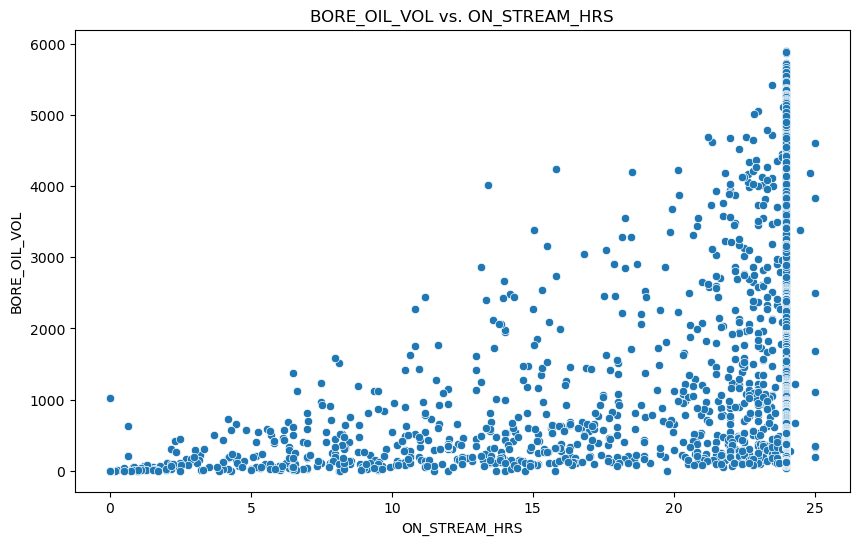

In [9]:
# BORE_OIL_VOL vs. ON_STREAM_HRS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ON_STREAM_HRS', y='BORE_OIL_VOL', data=df)
plt.title('BORE_OIL_VOL vs. ON_STREAM_HRS')
plt.xlabel('ON_STREAM_HRS')
plt.ylabel('BORE_OIL_VOL')
plt.show()

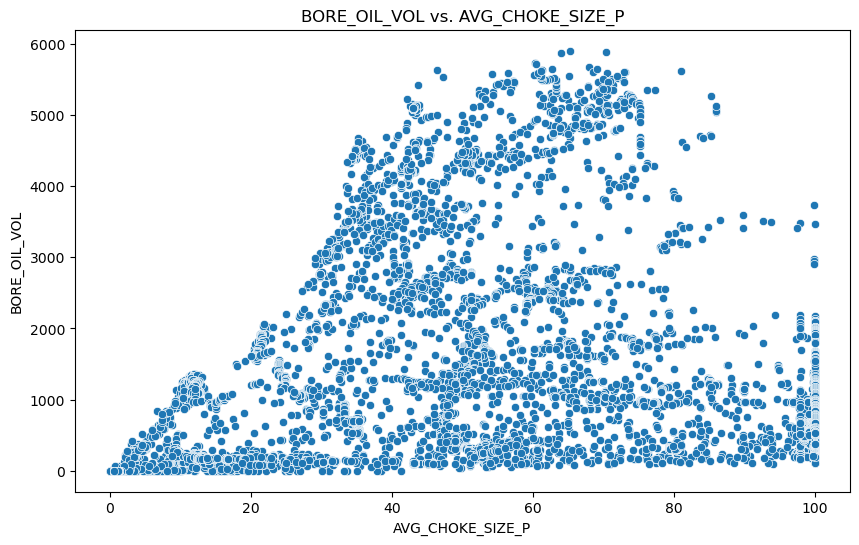

In [10]:
# BORE_OIL_VOL vs. AVG_CHOKE_SIZE_P
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_CHOKE_SIZE_P', y='BORE_OIL_VOL', data=df)
plt.title('BORE_OIL_VOL vs. AVG_CHOKE_SIZE_P')
plt.xlabel('AVG_CHOKE_SIZE_P')
plt.ylabel('BORE_OIL_VOL')
plt.show()

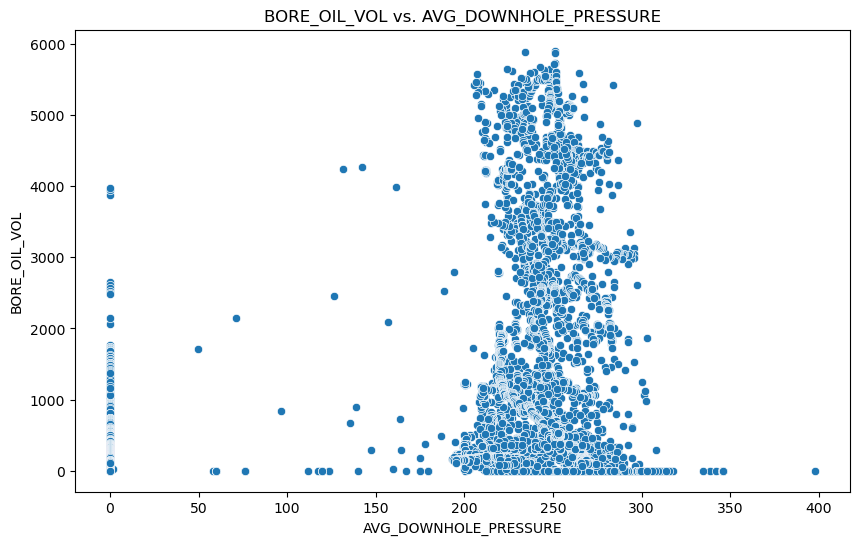

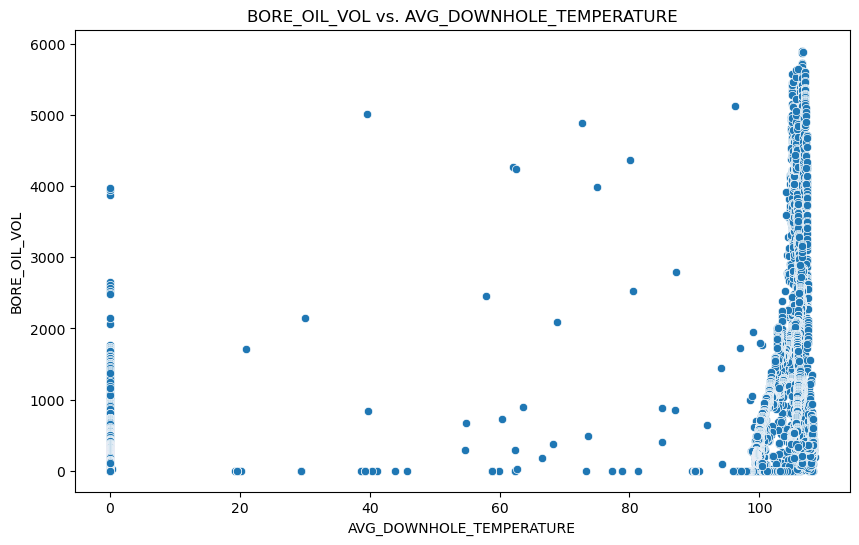

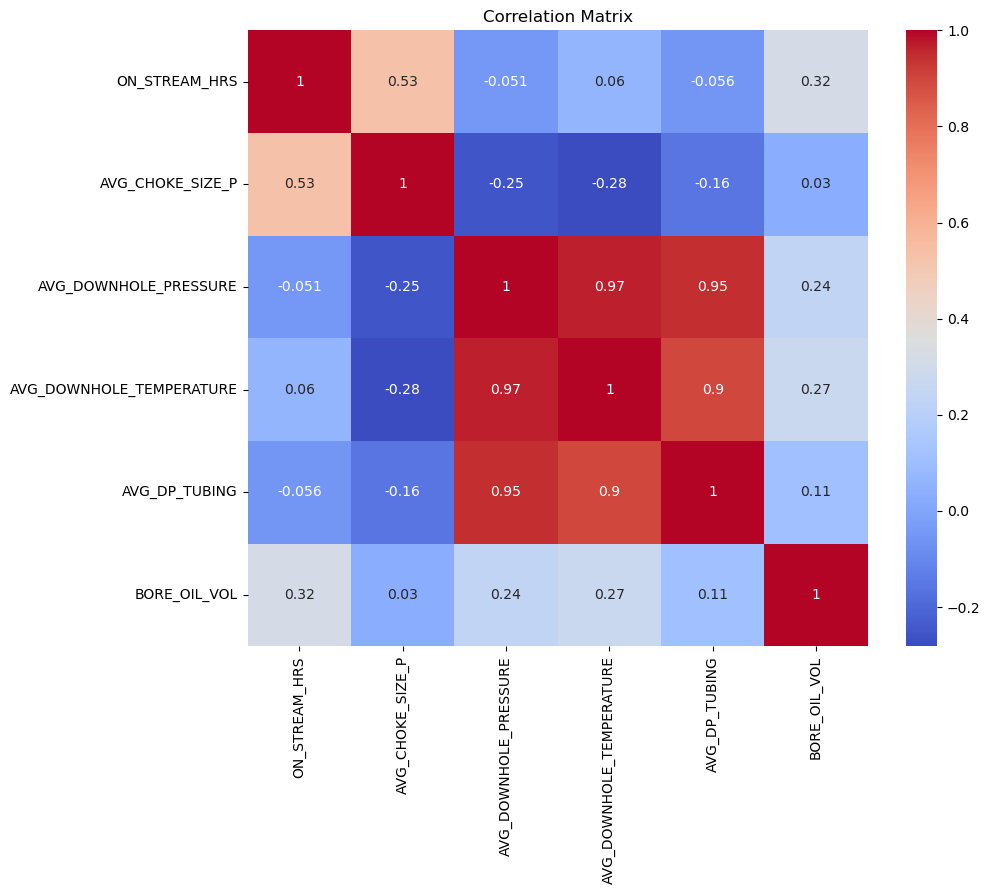

In [11]:
# 5. Analyze Other Variables (Example with pressure and temperature)

# Example: Scatter plot of AVG_DOWNHOLE_PRESSURE vs. BORE_OIL_VOL
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_DOWNHOLE_PRESSURE', y='BORE_OIL_VOL', data=df)
plt.title('BORE_OIL_VOL vs. AVG_DOWNHOLE_PRESSURE')
plt.xlabel('AVG_DOWNHOLE_PRESSURE')
plt.ylabel('BORE_OIL_VOL')
plt.show()

# Example: Scatter plot of AVG_DOWNHOLE_TEMPERATURE vs. BORE_OIL_VOL
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_DOWNHOLE_TEMPERATURE', y='BORE_OIL_VOL', data=df)
plt.title('BORE_OIL_VOL vs. AVG_DOWNHOLE_TEMPERATURE')
plt.xlabel('AVG_DOWNHOLE_TEMPERATURE')
plt.ylabel('BORE_OIL_VOL')
plt.show()

# Correlation matrix
correlation_matrix = df[['ON_STREAM_HRS', 'AVG_CHOKE_SIZE_P', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'BORE_OIL_VOL']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8919 entries, 1911 to 15632
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   8919 non-null   datetime64[ns]
 1   NPD_WELL_BORE_NAME        8919 non-null   object        
 2   ON_STREAM_HRS             8919 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     8919 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8919 non-null   float64       
 5   AVG_DP_TUBING             8919 non-null   float64       
 6   AVG_ANNULUS_PRESS         8919 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_WHP_P                 8919 non-null   float64       
 9   AVG_WHT_P                 8919 non-null   float64       
 10  DP_CHOKE_SIZE             8919 non-null   float64       
 11  BORE_OIL_VOL              8919 non-null   float64       
 12  BORE_GAS_VOL         

In [13]:
# Data Scaling (Important for Linear Regression)
X = df[['ON_STREAM_HRS', 'AVG_CHOKE_SIZE_P', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
        'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P', 'AVG_WHT_P']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['BORE_OIL_VOL']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

RFR =RandomForestRegressor()
RFR.fit(X_train,y_train)
Ypred = RFR.predict(X_test)
RFR.score(X_test, y_test) * 100


98.4546504822799

In [15]:
feature_imp = pd.Series(RFR.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

AVG_WHP_P                   0.401463
AVG_WHT_P                   0.378019
AVG_CHOKE_SIZE_P            0.059721
ON_STREAM_HRS               0.038563
AVG_DP_TUBING               0.037917
AVG_ANNULUS_PRESS           0.036327
AVG_DOWNHOLE_TEMPERATURE    0.034238
AVG_DOWNHOLE_PRESSURE       0.013752
dtype: float64

In [16]:
# 6. Predictive Model

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, linear_predictions))
print("R-squared:", r2_score(y_test, linear_predictions))
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_) # Add this line


# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("R-squared:", r2_score(y_test, rf_predictions))

# GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_test)
print("\nGradientBoostingRegressor:")
print("Mean Squared Error:", mean_squared_error(y_test, gbr_predictions))
print("R-squared:", r2_score(y_test, gbr_predictions))

Linear Regression Results:
Mean Squared Error: 942558.3776035479
R-squared: 0.46501648474570323
Coefficients: [ 109.85330049 -251.78293296  609.17884359  394.23351209 -778.73111747
 -204.24348492  359.86935869  743.36090326]
Intercept: 1123.2931921477623

Random Forest Results:
Mean Squared Error: 26586.56617118074
R-squared: 0.9849098210076259

GradientBoostingRegressor:
Mean Squared Error: 68639.25213238905
R-squared: 0.9610412794976432


In [17]:
linear_pred = linear_model.predict(X_scaled)
rf_pred = rf_model.predict(X_scaled)
gbr_pred = gbr_model.predict(X_scaled)

# Add the prediction columns to the DataFrame 'df'
df['pred_L_reg'] = linear_pred
df['pred_RFR'] = rf_pred
df['gbr_pred'] = gbr_pred

data_featured = df[['DATEPRD','BORE_OIL_VOL','pred_L_reg','pred_RFR','gbr_pred']]
data_featured

,DATEPRD,BORE_OIL_VOL,pred_L_reg,pred_RFR,gbr_pred
1911,2008-02-12,285.0,1041.640819,285.15,304.767429
1912,2008-02-13,1870.0,2662.787525,1652.14,1480.087792
1913,2008-02-14,3124.0,3086.251011,2983.06,2892.459180
1914,2008-02-15,2608.0,3295.095521,2583.32,1986.622799
1915,2008-02-16,3052.0,3129.585112,2894.08,2361.282423
...,...,...,...,...,...
1910,2016-09-17,180.0,679.176939,275.64,199.897324
4966,2016-09-17,0.0,-1687.676499,0.00,-41.614963
9000,2016-09-17,0.0,-2053.272580,0.00,-55.330668
8022,2016-09-17,0.0,-1399.502217,0.00,-18.599075


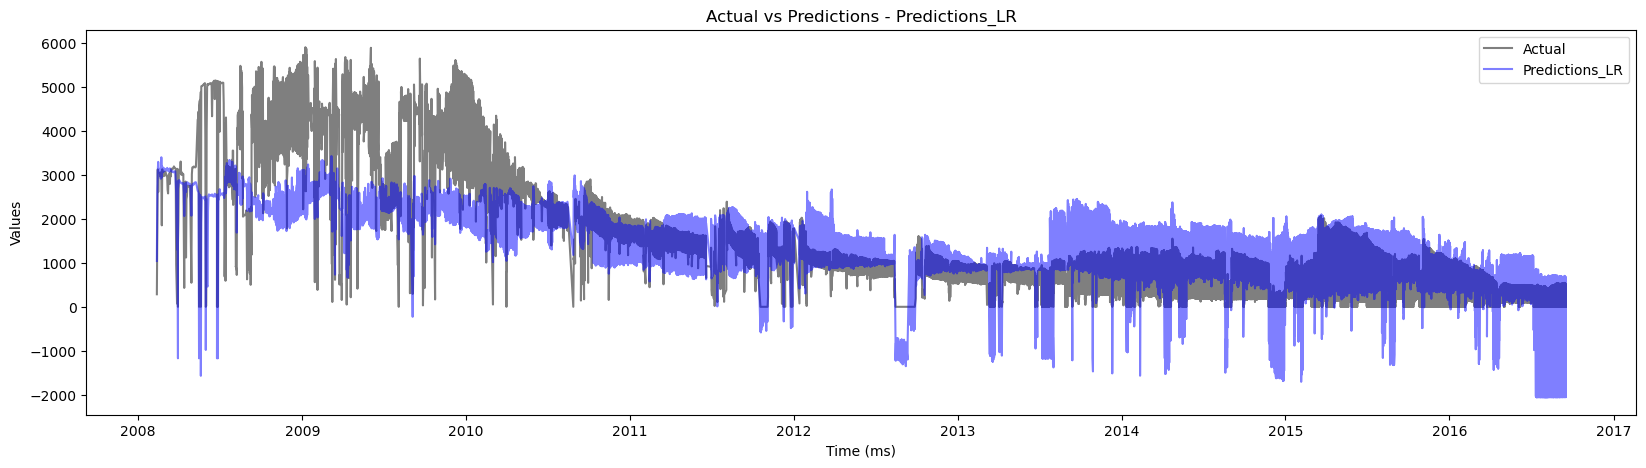

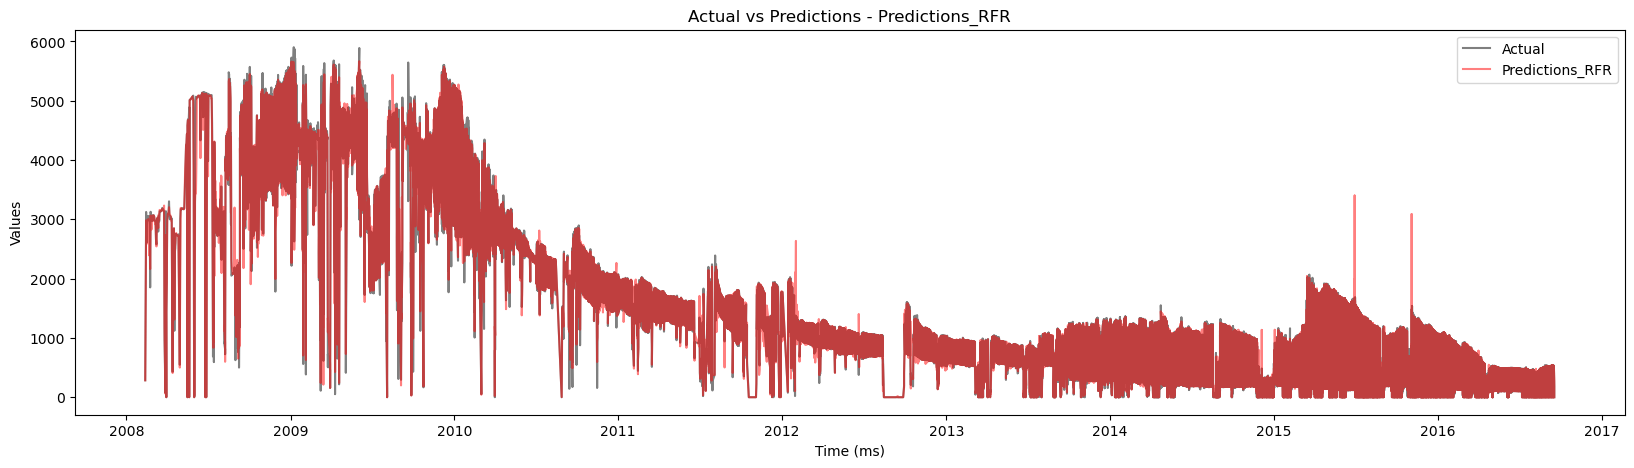

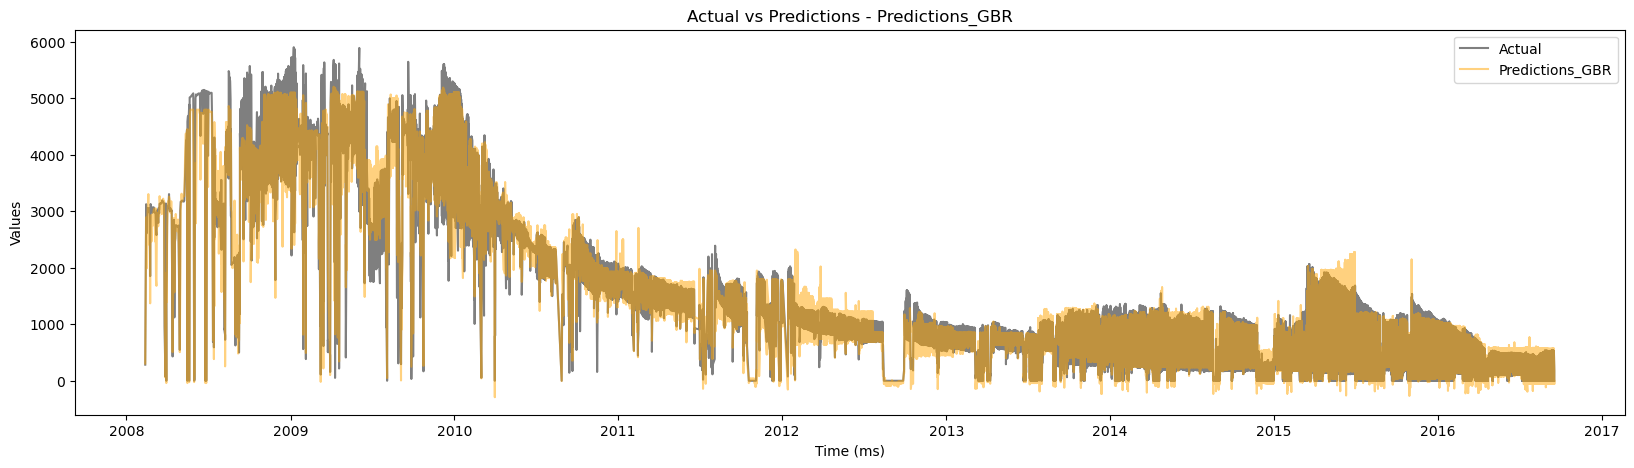

In [21]:
# Define a list of models and their respective colors and labels
models = [
    ('pred_L_reg', 'blue', 'Predictions_LR'),
    ('pred_RFR', 'red', 'Predictions_RFR'),
    ('gbr_pred', 'orange', 'Predictions_GBR'),
]

# Actual values
actual = data_featured['BORE_OIL_VOL']
depth = data_featured['DATEPRD']

# Create separate plots for each model
for model, color, label in models:
    plt.figure(figsize=(20, 5))
    plt.plot(depth, actual, c='black', alpha=0.5, label='Actual')
    plt.plot(depth, data_featured[model], c=color, alpha=0.5, label=label)

    # Labels and title
    plt.xlabel("Time (ms)")
    plt.ylabel("Values")
    plt.title(f"Actual vs Predictions - {label}")
    plt.legend()

    # Show the plot
    plt.show()

### The best algorithm is Random Forest Regression 

In [19]:
# --- Optimization Function (Per Well) ---

def optimize_production(well_df, target_oil='BORE_OIL_VOL', target_water='BORE_WAT_VOL',
                       features=['ON_STREAM_HRS', 'AVG_CHOKE_SIZE_P', 'AVG_DOWNHOLE_PRESSURE',
                                 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
                                 'AVG_WHP_P', 'AVG_WHT_P'],
                        objective='maximize_oil_minimize_water',
                        choke_size_range=(0, 100),  # Define a range for choke size
                        on_stream_hrs_range=(0, 24), #Define the range of hours
                        grid_density=50):        # Increased grid density

    # Feature selection 
    X = well_df[features].select_dtypes(include=np.number)
    y_oil = well_df[target_oil]
    y_water = well_df[target_water]

    # Drop rows where *any* of the selected features OR target are NaN
    combined = pd.concat([X, y_oil, y_water], axis=1).dropna()
    if combined.empty:
        return None  
        
    X = combined[features]
    y_oil = combined[target_oil]
    y_water = combined[target_water]

    # Train a separate model for oil production
    X_train_oil, X_test_oil, y_train_oil, y_test_oil = train_test_split(X, y_oil, test_size=0.2, random_state=42)
    model_oil = RandomForestRegressor(n_estimators=100, random_state=42)
    model_oil.fit(X_train_oil, y_train_oil)

     # Train a separate model for water production.
    X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(X, y_water, test_size=0.2, random_state=42)
    model_water = RandomForestRegressor(n_estimators=100, random_state=42)
    model_water.fit(X_train_water, y_train_water)



    best_oil_production = -np.inf  # Initialize with negative infinity
    best_on_stream_hrs = None
    best_avg_choke_size_p = None
    min_water_production = np.inf 
    
    # Grid search 
    for hrs in np.linspace(on_stream_hrs_range[0], on_stream_hrs_range[1], num=grid_density):
        for choke_size in np.linspace(choke_size_range[0], choke_size_range[1], num=grid_density):
            # Create input array for prediction
            input_features = np.array([hrs, choke_size] + [X_train[col].mean() for col in X_train.columns[2:]]).reshape(1, -1)
            input_df = pd.DataFrame(input_features, columns=X_train.columns)


            predicted_oil = model_oil.predict(input_df)[0]

            predicted_water = model_water.predict(input_df)[0]

            # Define objective function
            # تعظيم الفرق بين بين إنتاج النفط المتوقع وإنتاج الماء المتوقع 
            if objective == 'maximize_oil_minimize_water':
                objective_value = predicted_oil - predicted_water # Maximize the difference.
            # elif objective == 'maximize_oil':
            #    objective_value = predicted_oil

            # Update best solution if necessary
            if objective_value > best_oil_production:
                best_oil_production = objective_value
                best_on_stream_hrs = hrs
                best_avg_choke_size_p = choke_size
                min_water_production = predicted_water #added line


    return best_on_stream_hrs, best_avg_choke_size_p, best_oil_production, min_water_production

### --- Run Optimization for Each Well ---

In [20]:
results = {}
for well_name, well_df in well_dataframes.items():
    print(f"Optimizing for well: {well_name}")
    optimization_result = optimize_production(well_df)
    if optimization_result: 
      best_hrs, best_choke, best_oil, min_water = optimization_result
      results[well_name] = {'optimal_on_stream_hrs': best_hrs,
                             'optimal_avg_choke_size_p': best_choke,
                              'predicted_oil_production': best_oil,
                              "min_water_production": min_water}
      print(f"  Optimal ON_STREAM_HRS: {best_hrs:.2f}")
      print(f"  Optimal AVG_CHOKE_SIZE_P: {best_choke:.2f}")
      print(f"  Predicted Oil Production: {best_oil:.2f}")
      print(f"  Minimum Water Production: {min_water:.2f}")
    else:
      print(f"  Skipping well {well_name} due to insufficient data.")

Optimizing for well: 15/9-F-12
  Optimal ON_STREAM_HRS: 24.00
  Optimal AVG_CHOKE_SIZE_P: 67.35
  Predicted Oil Production: 3429.17
  Minimum Water Production: 283.97
Optimizing for well: 15/9-F-14
  Optimal ON_STREAM_HRS: 24.00
  Optimal AVG_CHOKE_SIZE_P: 36.73
  Predicted Oil Production: 2209.08
  Minimum Water Production: 27.68
Optimizing for well: 15/9-F-11
  Optimal ON_STREAM_HRS: 24.00
  Optimal AVG_CHOKE_SIZE_P: 10.20
  Predicted Oil Production: 834.97
  Minimum Water Production: 179.52
Optimizing for well: 15/9-F-15 D
  Optimal ON_STREAM_HRS: 23.02
  Optimal AVG_CHOKE_SIZE_P: 28.57
  Predicted Oil Production: 165.53
  Minimum Water Production: 130.41
Optimizing for well: 15/9-F-1 C
  Optimal ON_STREAM_HRS: 23.51
  Optimal AVG_CHOKE_SIZE_P: 48.98
  Predicted Oil Production: 466.54
  Minimum Water Production: 95.84
Optimizing for well: 15/9-F-5
  Optimal ON_STREAM_HRS: 6.37
  Optimal AVG_CHOKE_SIZE_P: 69.39
  Predicted Oil Production: 105.56
  Minimum Water Production: 152.35
